In [1]:
# demo on handwritten digits 
import seaborn as sns
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
digits.images.shape


(1797, 8, 8)

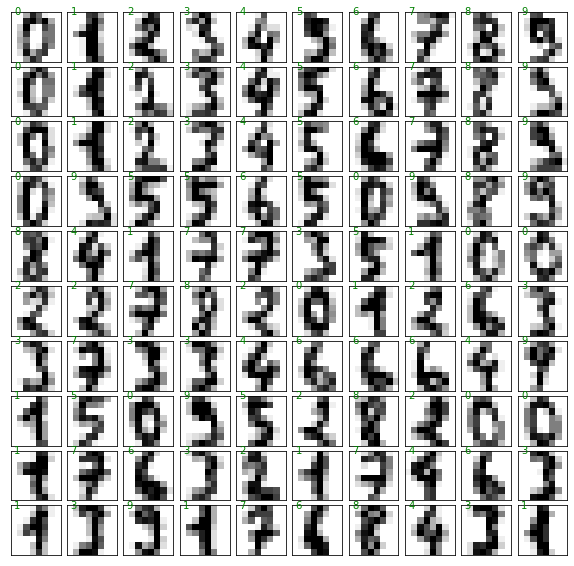

In [2]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(10,10,figsize=(10,10),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
# when we use enumerate we can iterate over the item along with an index
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(.05,.05,str(digits.target[i]),color='green')
    
    

In [3]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


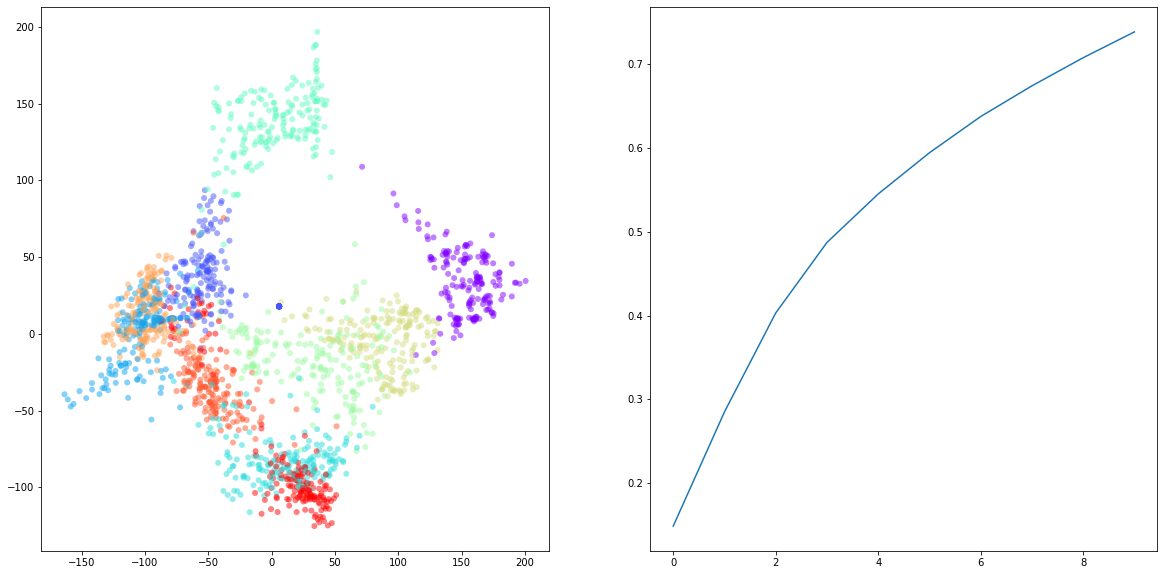

In [4]:
# for creating a supervised model we need X and y. Currently we have very large number of features for X where we would like to
# reduce the dimension to 2 

fig,ax = plt.subplots(1,2,figsize=(20,10))
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
model.fit(digits.data)
projected = model.transform(digits.data)
projected.shape
ax[0].scatter(projected[:,0],projected[:,1],c=digits.target,alpha=0.5,edgecolor='none',cmap=plt.cm.get_cmap('rainbow',10))
#plt.colorbar(label='digit label', ticks=range(10))

from sklearn.decomposition import PCA
pca_model = PCA(n_components=10)
pca_model.fit(digits.data)
pca_projected = pca_model.transform(digits.data)
ax[1].plot(np.cumsum(pca_model.explained_variance_ratio_))

# the below plot shows that reducing dimensions 64 to 2 dimensions are able to differentiate between different class of digits 



In [5]:
# classification of digits - we would be using a GaussianNaiveBayes model to do classification

# division of data into train and test data.
from sklearn.model_selection import train_test_split 
Xtrain,Xtest,ytrain,ytest = train_test_split(pca_projected,digits.target,random_state=0)


In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_predict = model.predict(Xtest)



In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_predict)

0.9066666666666666

In [8]:
# the issue with accuracy is we are not getting classwise accuracy. for that we would be using confusion matrix 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_predict)


Text(91.68, 0.5, 'y_predict')

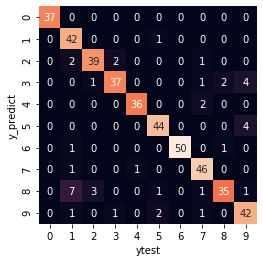

In [9]:
sns.heatmap(mat,annot=True,square=True,cbar=False)
plt.xlabel("ytest")
plt.ylabel("y_predict")

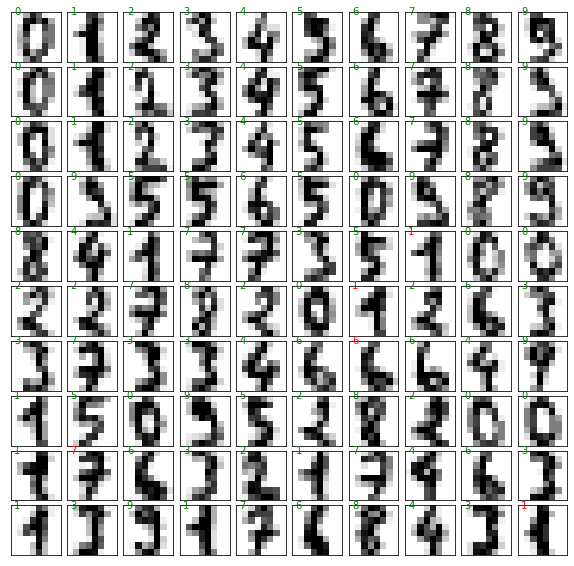

In [10]:
# above heatmap of confusion matrix clearly shows where is misclassification happening. for example lot of '2' 
# are misclassified as 7 (19/12).

fig,axes = plt.subplots(10,10,figsize=(10,10),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
# when we use enumerate we can iterate over the item along with an index
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(.05,.05,str(digits.target[i]),color='green' if (ytest[i]==y_predict[i]) else 'red')
